In [55]:
!pip install numpy
!pip install opencv-python
!pip install matplotlib
!pip install -U scikit-image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 2.5 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.3/313.3 kB 4.0 MB/s eta 0:00:000:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 3.7 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.9/222.9 kB 4.9 MB/s eta 0:00:00 MB/s eta 0:00:01


# Questão 1
Crie um algoritmo que implemente filtros de convolução. O algoritmo deverá receber comoparâmetro a imagem a ser processada, o filtro e o tratamento a ser feito na borda.

A imagem poderá ser colorida ou em tons de cinza. No caso de imagens coloridas, o processamento deverá ser feito em cada banda de cor o resultado será retornado em uma única imagem;

O filtro será uma matrix MxN, onde M e N são: 
    Ímpares;
    Maiores ou iguais a 3;
    Menores que o tamanho da imagem (em cada dimensão).

O parâmetro borda deverá ter 4 valores possíveis:

    ‘ignore’: nesse caso a borda não será processada;
    ‘espelho’: no tratamento da borda os pixels serão espelhados;
    ‘zero’: o tratamento da borda será adicionando pixels de valor zero;
    ‘replicar’: nesse caso, no tratamento da borda somente os pixels das linhas extremas serão replicados.
    Teste a função de convolução com pelo menos 5 filtros diferentes. 
    Explique os resultados.


In [44]:
import numpy as np

def kernelSize(tam):
        return int((tam -1)/2 )
    
def convolucao(imagem:np.ndarray, filtro:np.ndarray, borda:str="ignore"):


    """
    Ex 3x3:
        Kernel[[, , , ] ,[, , ,], [, , , ]]
        Filtro [[1,2,3],[1,2,3],[1,2,3]]
    """
    

    m,n = filtro.shape
    
    if (m % 2 !=0 and m >= 3 and m < imagem.shape[0]) and  (n % 2 != 0 and n >= 3 and n < imagem.shape[1]):
        
        new_image = np.zeros(imagem.shape)
            
            
        match borda:
            case "ignore":
                image_aux = imagem
            
            case "espelho":
                start_line = 0
                last_line = -1
                for _ in range(kernelSize(m)):
                    image_aux = np.vstack([imagem[start_line],imagem,imagem[last_line]])
                    image_aux = np.column_stack((image_aux[:,start_line],image_aux,image_aux[:,last_line])) 
                    start_line +=2 
                    last_line = last_line -2
            case "zero":
                
                for _ in range(kernelSize(m)):# for para saber quantas vezes será preciso interagir com a matriz até tratar as bordas
                    zeros_c = np.zeros(imagem.shape[0]) #adicionando uma coluna com a quantidade de linhas que precisam ser adicionadas na matriz
                    image_aux = np.column_stack((zeros_c,imagem,zeros_c)) #adicionando uma coluna adequada no lado esquerdo e direito da matriz
                    zeros_l = np.zeros(image_aux.shape[1]) # Linhas contendo a quantidade de colunas para serem adicionadas
                    image_aux = np.vstack([zeros_l,image_aux,zeros_l]) # adiciona as linhas em baixo e em cima da matriz
                    
                
            case "replicar":
                start_line = 0
                last_line = -1
                for _ in range(kernelSize(m)):
                    image_aux = np.vstack([imagem[start_line],imagem,imagem[last_line]])
                    image_aux = np.column_stack((image_aux[:,start_line],image_aux,image_aux[:,last_line])) 
                    start_line +=1
                    last_line = last_line -1
            
            case _:
                raise ValueError("Borda Invalida")

        
        linha,coluna = image_aux.shape[0:2]
        
        for l in range(0,linha,1):
            for c in range(0,coluna,1):
                
                if (l + m < linha and c + n < coluna) and (l > kernelSize(m) and c > kernelSize(n)): #só pega os valores que não afeta as bordas

                    new_image[l][c] = sum([sum(valor) for valor in (filtro * image_aux[l:l+m,c:c+n])])/(m*n) #média
                
        return new_image
    
    else:
        raise ValueError("O filtro deve ser impar, maior que 3 e menos que a resolução da matriz")

# Testes:

In [ ]:
import cv2
imagem = cv2.imread('cabra.jpg')
imagem = cv2.cvtColor(imagem,cv2.COLOR_BGR2GRAY)

#filtro = np.array([[1, 1, 1],[1, 1, 1],[1, 1, 1]])

#convolucao(imagem,filtro,'zero')
#convolucao(imagem,filtro,'espelho')
#convolucao(imagem,filtro,'ignore')
#convolucao(imagem,filtro,'replicar')
#cv2.imwrite('teste4.jpg',convolucao(imagem,filtro,'espelho'))


# Filtros aplicados

## Identidade: 
|  0   |  0   |  0   |
|------|------|------|
|  0   |  1   |  0   |
|  0   |  0   |  0   |

## Laplaciano
|  0   |  1   |  0   |
|------|------|------|
|  1   | -4   |  1   |
|  0   |  1   |  0   |

## Filtro de Sobel para detecção de bordas na horizontal:
| -1   | -2   | -1   |
|------|------|------|
|  0   |  0   |  0   |
|  1   |  2   |  1   |

## Filtro gaussiano:
| 1/16 | 2/16 | 1/16 |
|------|------|------|
| 2/16 | 4/16 | 2/16 |
| 1/16 | 2/16 | 1/16 |

## Filtro de média:
| 1/9  | 1/9  | 1/9  |
|------|------|------|
| 1/9  | 1/9  | 1/9  |
| 1/9  | 1/9  | 1/9  |


# Resultados

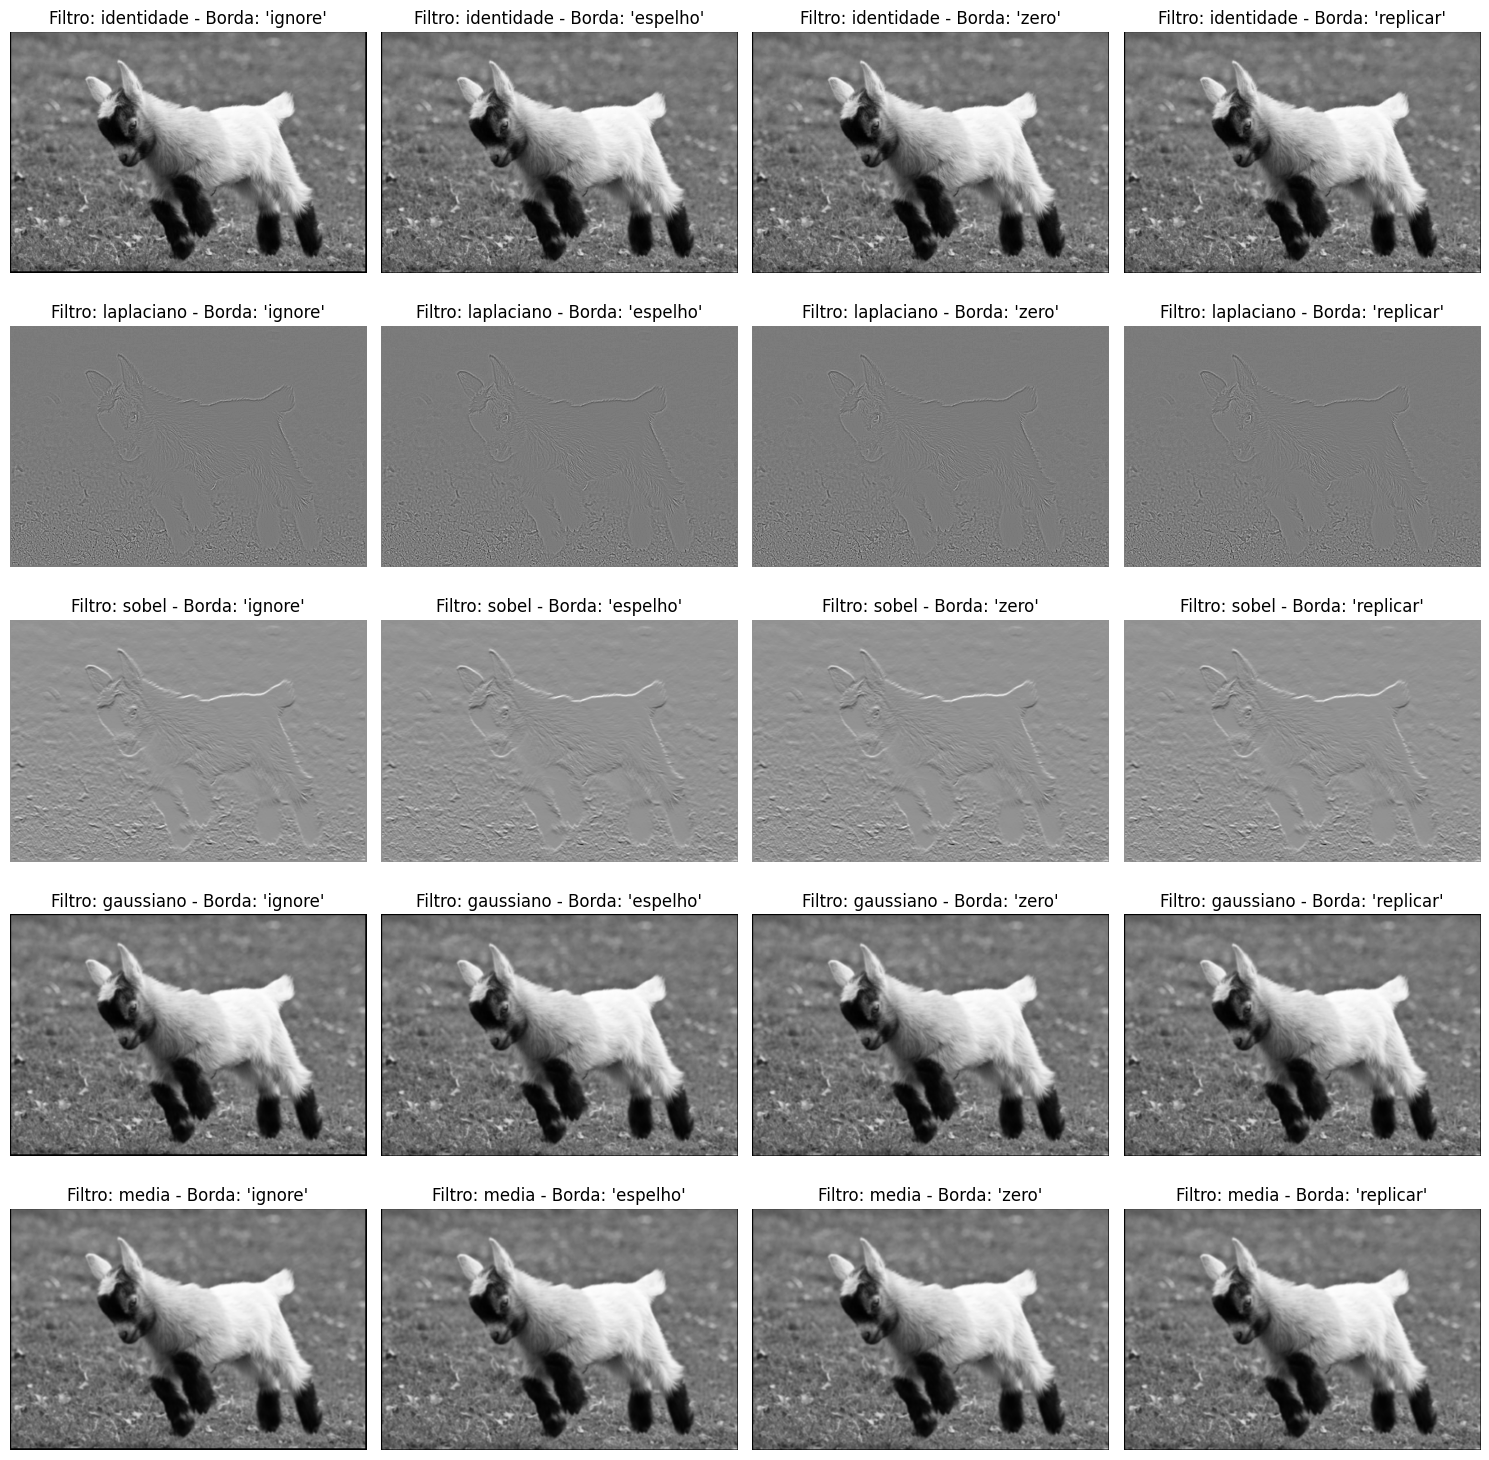

In [10]:
import cv2
import matplotlib.pyplot as plt

imagem = cv2.imread('cabra.jpg')
imagem = cv2.cvtColor(imagem,cv2.COLOR_BGR2GRAY)

identidade = np.array([[0,0,0],[0,1,0],[0,0,0]])
laplaciano = np.array([[0,1,0],[1,-4,1],[0,1,0]])
sobel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
gaussiano = np.array([[1/16,2/16,1/16],[2/16,4/16,2/16],[1/16,2/16,1/16]])
media = np.array([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]])

nomes = ['identidade','laplaciano','sobel','gaussiano','media']


filtros = [identidade,laplaciano, sobel, gaussiano,media]
bordas = ['ignore', 'espelho', 'zero', 'replicar']
fig, axs = plt.subplots(len(filtros), len(bordas), figsize=(15, 15))

for i,filtro in enumerate(filtros):
    for j,borda in enumerate(bordas):
        
        axs[i, j].imshow(convolucao(imagem,filtro,borda), cmap='gray')
        axs[i, j].set_title(f"Filtro: {nomes[i]} - Borda: '{borda}'")
        axs[i, j].axis('off')

plt.tight_layout()
plt.show()

# Questão 2
Crie uma função para aplicar filtros não-lineares, os filtros possíveis deverão ser o seguinte:
    Mediana
    Moda
    Máximo
    Mínimo
    

# Reaproveitamento da função da questão 1 com a adição de novos resultados sendo mode = ["mediana","moda","maximo","minimo"]

In [38]:
import numpy as np

def kernelSize(tam):
        return int((tam -1)/2 )
    
def convolucao_2(imagem:np.ndarray, filtro:np.ndarray, borda:str="ignore", mode="max"):


    """
    Ex 3x3:
        Kernel[[, , , ] ,[, , ,], [, , , ]]
        Filtro [[1,2,3],[1,2,3],[1,2,3]]
    """
    

    m,n = filtro.shape
    
    if (m % 2 !=0 and m >= 3 and m < imagem.shape[0]) and  (n % 2 != 0 and n >= 3 and n < imagem.shape[1]):
        
        new_image = np.zeros(imagem.shape)
            
            
        match borda:
            case "ignore":
                image_aux = imagem
            
            case "espelho":
                start_line = 0
                last_line = -1
                for _ in range(kernelSize(m)):
                    image_aux = np.vstack([imagem[start_line],imagem,imagem[last_line]])
                    image_aux = np.column_stack((image_aux[:,start_line],image_aux,image_aux[:,last_line])) 
                    start_line +=2 
                    last_line = last_line -2
            case "zero":
                
                for _ in range(kernelSize(m)):# for para saber quantas vezes será preciso interagir com a matriz até tratar as bordas
                    zeros_c = np.zeros(imagem.shape[0]) #adicionando uma coluna com a quantidade de linhas que precisam ser adicionadas na matriz
                    image_aux = np.column_stack((zeros_c,imagem,zeros_c)) #adicionando uma coluna adequada no lado esquerdo e direito da matriz
                    zeros_l = np.zeros(image_aux.shape[1]) # Linhas contendo a quantidade de colunas para serem adicionadas
                    image_aux = np.vstack([zeros_l,image_aux,zeros_l]) # adiciona as linhas em baixo e em cima da matriz
                    
                
            case "replicar":
                start_line = 0
                last_line = -1
                for _ in range(kernelSize(m)):
                    image_aux = np.vstack([imagem[start_line],imagem,imagem[last_line]])
                    image_aux = np.column_stack((image_aux[:,start_line],image_aux,image_aux[:,last_line])) 
                    start_line +=1
                    last_line = last_line -1
            
            case _:
                raise ValueError("Borda Invalida")

        
        linha,coluna = image_aux.shape[0:2]
        
        for l in range(0,linha,1):
            for c in range(0,coluna,1):
                
                if (l + m < linha and c + n < coluna) and (l > kernelSize(m) and c > kernelSize(n)): #só pega os valores que não afeta as bordas
                    
                    match mode:
                        
                        case "mediana":
                            np.median([sum(valor) for valor in (filtro * image_aux[l:l+m,c:c+n])])
                        case "moda":
                            np.bincount([sum(valor) for valor in (filtro * image_aux[l:l+m,c:c+n])]).argmax()
                        case "max":
                            np.max([sum(valor) for valor in (filtro * image_aux[l:l+m,c:c+n])])
                        case "min":
                            np.min([sum(valor) for valor in (filtro * image_aux[l:l+m,c:c+n])])
                        
                        case _:
                            new_image[l][c] = sum([sum(valor) for valor in (filtro * image_aux[l:l+m,c:c+n])])/(m*n) #média        
    
                    
                
        return new_image
    
    else:
        raise ValueError("O filtro deve ser impar, maior que 3 e menos que a resolução da matriz")

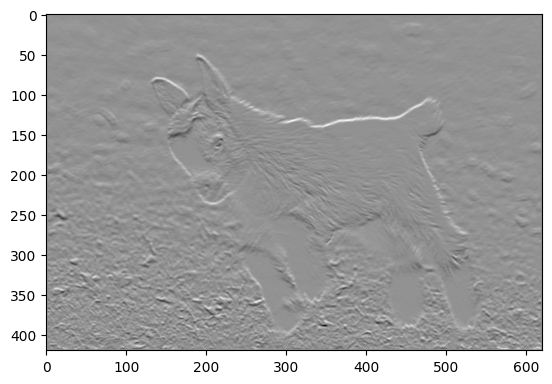

In [41]:
teste62 = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

plt.imshow(convolucao_2(imagem,teste62,'zero','max'),cmap='gray')

# Questão 3
Utilizando o algoritmo da questão 1, aplique o filtro Laplaciano em uma imagem em tons decinza. Utilize o filtro para realçar a imagem utilizada. O que aconteceu com a imagem apósa aplicação do realce?

`Resposta: De forma bem borrada, mas é possivel notar o realce das bordas, entretanto todo o resto da imagem é perdido`

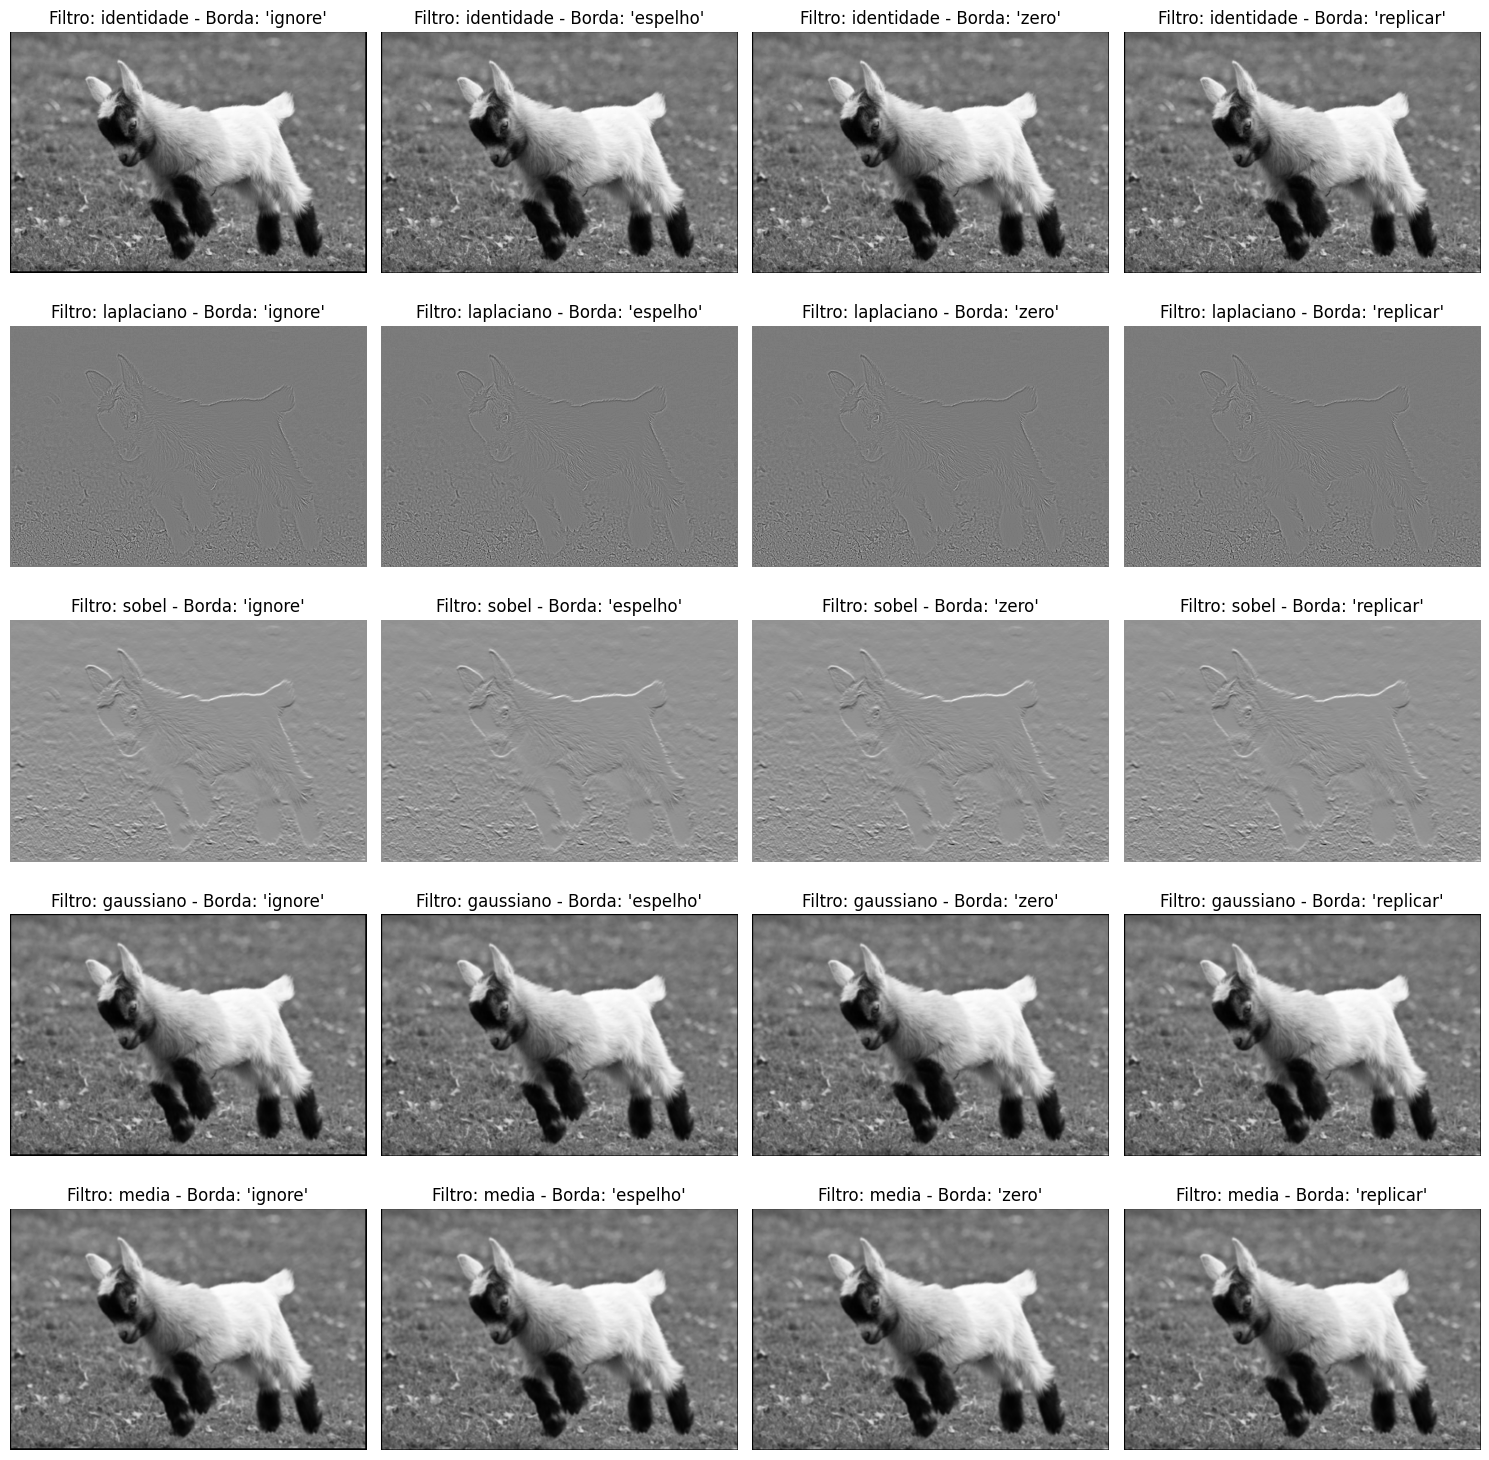

In [45]:
import cv2
import matplotlib.pyplot as plt

imagem = cv2.imread('cabra.jpg')
imagem = cv2.cvtColor(imagem,cv2.COLOR_BGR2GRAY)

identidade = np.array([[0,0,0],[0,1,0],[0,0,0]])
laplaciano = np.array([[0,1,0],[1,-4,1],[0,1,0]])
sobel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
gaussiano = np.array([[1/16,2/16,1/16],[2/16,4/16,2/16],[1/16,2/16,1/16]])
media = np.array([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]])

nomes = ['identidade','laplaciano','sobel','gaussiano','media']


filtros = [identidade,laplaciano, sobel, gaussiano,media]
bordas = ['ignore', 'espelho', 'zero', 'replicar']
fig, axs = plt.subplots(len(filtros), len(bordas), figsize=(15, 15))

for i,filtro in enumerate(filtros):
    for j,borda in enumerate(bordas):
        
        axs[i, j].imshow(convolucao(imagem,filtro,borda), cmap='gray')
        axs[i, j].set_title(f"Filtro: {nomes[i]} - Borda: '{borda}'")
        axs[i, j].axis('off')

plt.tight_layout()
plt.show()

# Questão 4
Implemente uma máscara de nitidez e uma filtragem high-boost utilizando o algoritmo daquestão 1. Explique os passos de ambas implementações e diferencie o resultado dasmesmas. Utilize pelo menos 3 valores de k no intervalor 0 < k < 2.

# Questão 5

Aplique os filtros da média e mediana em uma imagem ruidosa, o que aconteceu? Qual tipode ruído existia na imagem?

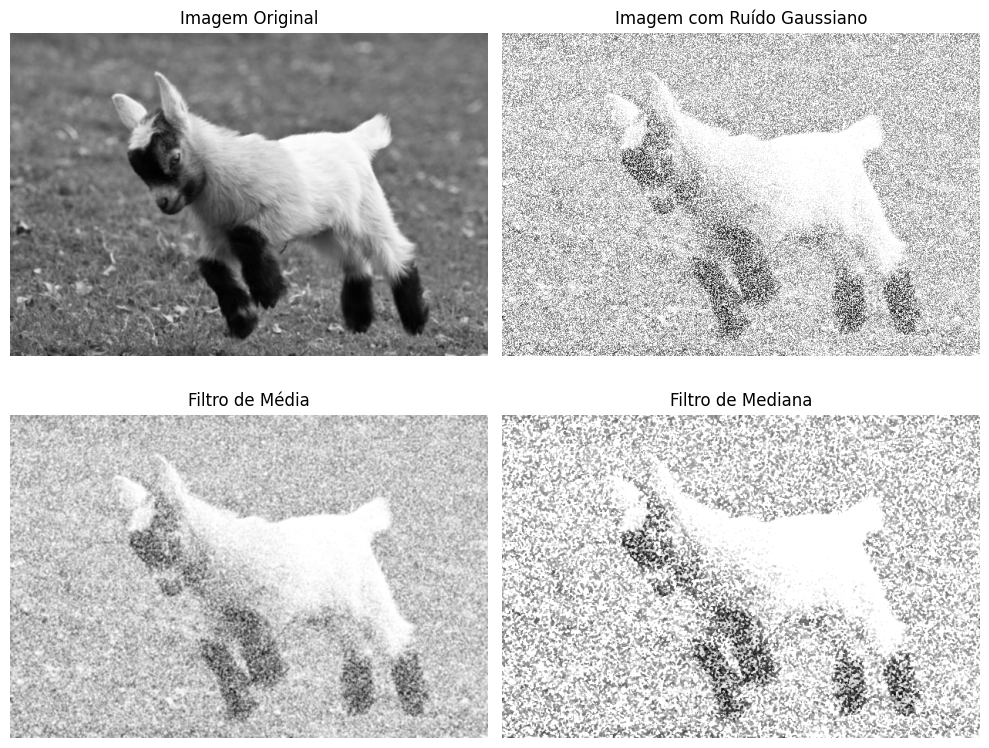

In [61]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('cabra.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  

# Adicionar ruído gaussiano à imagem
mean = 0
std_dev = 50
noise = np.random.normal(mean, std_dev, image.shape).astype(np.uint8)
noisy_image = cv2.add(image, noise)


filtered_mean = cv2.blur(noisy_image, (3, 3))  # Usando um kernel de 5x5
filtered_median = cv2.medianBlur(noisy_image, 3)  # Usando um kernel de 5x5

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(image,cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(noisy_image,cmap='gray')
plt.title('Imagem com Ruído Gaussiano')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(filtered_mean,cmap='gray')
plt.title('Filtro de Média')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(filtered_median,cmap='gray')
plt.title('Filtro de Mediana')
plt.axis('off')

plt.tight_layout()
plt.show()


/home/mauricio/Documentos/GitHub/6_periodo/CV/Treino/Enviar_5/.venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3550: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


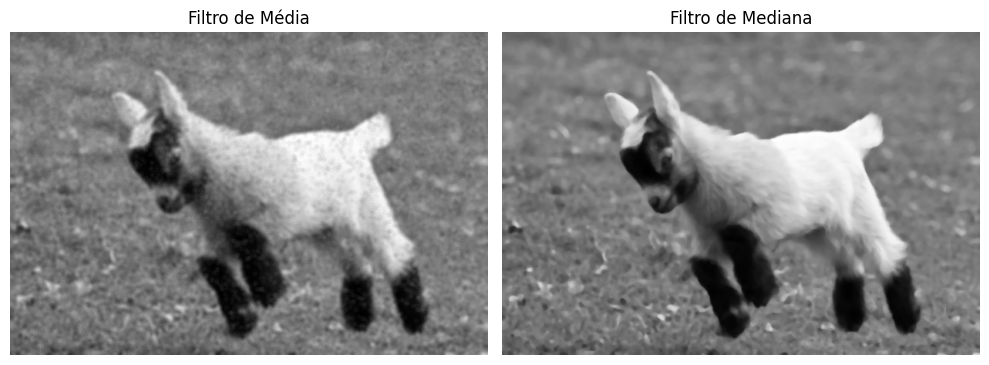

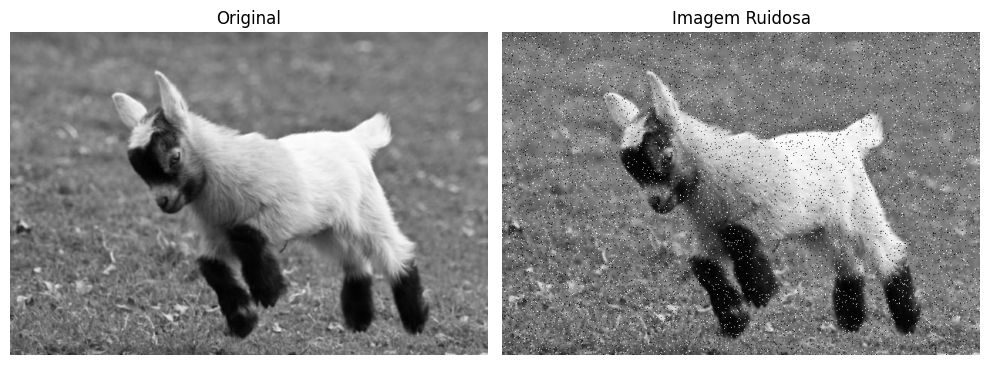

In [67]:
import matplotlib.pyplot as plt
from skimage import util, filters
from skimage.morphology import disk
from skimage.io import imread

# Carregar uma imagem de exemplo e adicionar ruído a ela
original_image = imread('cabra.jpg', as_gray=True)
noisy_image = util.random_noise(original_image, mode='s&p', amount=0.05)

# Aplicar filtros de média e mediana na imagem ruidosa
mean_filtered = filters.rank.mean(noisy_image, disk(3))
median_filtered = filters.rank.median(noisy_image, disk(3))  
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax = axes.ravel()

ax[0].imshow(mean_filtered, cmap='gray')
ax[0].set_title('Filtro de Média')
ax[1].imshow(median_filtered, cmap='gray')
ax[1].set_title('Filtro de Mediana')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(original_image, cmap='gray')
ax[0].set_title('Original')

ax[1].imshow(noisy_image, cmap='gray')
ax[1].set_title('Imagem Ruidosa')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()